In [1]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [12]:
# Import data

df = pd.read_csv("P:\Work in Progress\Mike Taylor\python\RecessionTimingRawData2024.csv")
df["s3_ur"] = df.ur.diff(3)
df.head(12)

,period,r10yr,rff,rbaa,r3mo,r1yr,r3yr,r5yr,rec,rec12mo,...,emp,ur,sp500,ip,cycle,r10yrffma,s6_lnsp500,s6_lnemp,s6_lnip,s3_ur
0,4/1/1953,2.83,NaN,3.65,2.19,2.36,2.51,2.62,0.0,1.0,...,50435,2.7,24.71,20.1048,prerecession,NaN,NaN,NaN,NaN,NaN
1,5/1/1953,3.05,NaN,3.78,2.16,2.48,2.72,2.87,0.0,1.0,...,50490,2.5,24.84,20.2156,prerecession,NaN,NaN,NaN,NaN,NaN
2,6/1/1953,3.11,NaN,3.86,2.11,2.45,2.74,2.94,0.0,1.0,...,50519,2.5,23.95,20.1325,prerecession,NaN,NaN,NaN,NaN,NaN
3,7/1/1953,2.93,NaN,3.86,2.04,2.38,2.62,2.75,0.0,1.0,...,50536,2.6,24.29,20.3817,prerecession,NaN,NaN,NaN,NaN,-0.1
4,8/1/1953,2.95,NaN,3.85,2.04,2.28,2.58,2.80,1.0,1.0,...,50489,2.7,24.39,20.2709,recession,NaN,NaN,NaN,NaN,0.2
5,9/1/1953,2.87,NaN,3.88,1.79,2.20,2.56,2.71,1.0,1.0,...,50368,2.9,23.27,19.8556,recession,NaN,NaN,NaN,NaN,0.4
6,10/1/1953,2.66,NaN,3.82,1.38,1.79,2.23,2.43,1.0,1.0,...,50240,3.1,23.97,19.6894,recession,NaN,-0.030405,-0.003874,-0.020878,0.5
7,11/1/1953,2.68,NaN,3.75,1.44,1.67,2.20,2.42,1.0,1.0,...,49908,3.5,24.50,19.2186,recession,NaN,-0.013782,-0.011594,-0.050576,0.8
8,12/1/1953,2.59,NaN,3.74,1.60,1.66,2.07,2.32,1.0,1.0,...,49703,4.5,24.83,18.7479,recession,NaN,0.036084,-0.016284,-0.071254,1.6
9,1/1/1954,2.48,NaN,3.71,1.18,1.41,1.89,2.17,1.0,1.0,...,49469,4.9,25.46,18.6094,recession,NaN,0.047044,-0.021340,-0.090971,1.8


In [13]:
df.columns

Index(['period', 'r10yr', 'rff', 'rbaa', 'r3mo', 'r1yr', 'r3yr', 'r5yr', 'rec',
       'rec12mo', 'r10yrff', 'emp', 'ur', 'sp500', 'ip', 'cycle', 'r10yrffma',
       's6_lnsp500', 's6_lnemp', 's6_lnip', 's3_ur'],
      dtype='object')

In [18]:
# Select subset of data

df2_oos = df[["period","rec12mo","s6_lnsp500","s6_lnemp","s3_ur","r10yrffma"]][~np.isnan(df.r10yrffma) & np.isnan(df.rec)]

df2 = df[["period","rec12mo","s6_lnsp500","s6_lnemp","s3_ur","r10yrffma"]][~np.isnan(df.r10yrffma) & ~np.isnan(df.rec)]
df2.tail()

,period,rec12mo,s6_lnsp500,s6_lnemp,s3_ur,r10yrffma
800,12/1/2019,1.0,0.094545,0.006265,0.1,-0.12
801,1/1/2020,1.0,0.089979,0.007334,0.0,-0.03
802,2/1/2020,1.0,0.123177,0.007606,-0.1,0.04
803,3/1/2020,1.0,-0.117184,-0.003044,0.8,0.13
804,4/1/2020,1.0,-0.075197,-0.149541,11.2,0.26


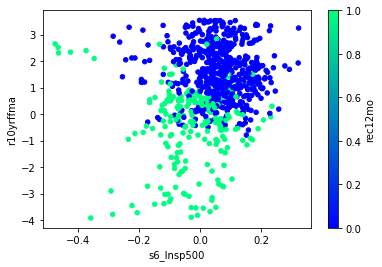

In [21]:
# Scatter plot of SP500 vs Emp (during recessions and expansions)

fig, ax = plt.subplots()
sc = df2.plot.scatter(x='s6_lnsp500', y='r10yrffma', c='rec12mo', colormap='winter', ax=ax) # rainbow

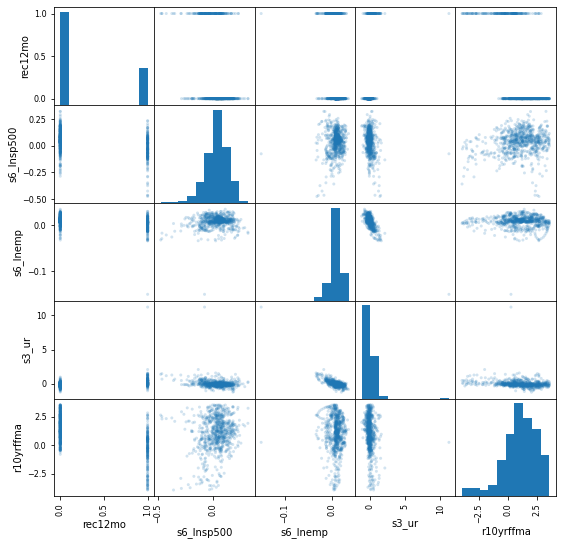

In [22]:
axes = pd.plotting.scatter_matrix(df2, alpha = 0.2, figsize = (9, 9), range_padding = 0.15)

In [24]:
from sklearn.model_selection import train_test_split

y = df2["rec12mo"]
X = df2[["s6_lnsp500","s6_lnemp","s3_ur","r10yrffma"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_oos = df2_oos["rec12mo"]
X_oos = df2_oos[["s6_lnsp500","s6_lnemp","s3_ur","r10yrffma"]]

In [97]:
# Models: Logistic, Random Forest, SVC, Voting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft') # hard

voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8346153846153846
RandomForestClassifier 0.9153846153846154
SVC 0.8307692307692308
VotingClassifier 0.8653846153846154


In [36]:
for name, score in zip(list(X_train), rnd_clf.feature_importances_):
    print(name,":", score)

s6_lnsp500 : 0.1596306634384844
s6_lnemp : 0.1445834881036344
s3_ur : 0.20375925663727132
r10yrffma : 0.4920265918206099


In [40]:
# Model: Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9153846153846154


In [64]:
# Model: Bagging ensembles (of Decision Trees)

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=350, bootstrap=True, n_jobs=-1, random_state=42) # 100
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.926923076923077


In [73]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, # 2 200
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(ada_clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.9153846153846154


In [50]:
# Random forest parameters

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, n_jobs=-1, random_state=42)
rnd_clf2.fit(X_train, y_train)
y_pred = rnd_clf2.predict(X_test)
display(accuracy_score(y_test, y_pred))

0.9192307692307692

In [101]:
pred_oos = bag_clf.predict_proba(X_oos)
dfpred_oos = pd.DataFrame(pred_oos, index = df2_oos.index.values)
xb_oos = pd.concat([df2_oos,dfpred_oos], axis=1)
xb_oos.tail(10)

,period,rec12mo,s6_lnsp500,s6_lnemp,s3_ur,r10yrffma,0,1
843,7/1/2023,NaN,0.129461,0.009248,0.1,-1.20,0.188,0.812
844,8/1/2023,NaN,0.088537,0.008739,0.1,-1.26,0.084,0.916
845,9/1/2023,NaN,0.105266,0.009369,0.2,-1.25,0.088,0.912
846,10/1/2023,NaN,0.035264,0.008632,0.3,-1.11,0.044,0.956
847,11/1/2023,NaN,0.072977,0.007845,-0.1,-1.00,0.084,0.916
848,12/1/2023,NaN,0.075265,0.008151,-0.1,-1.00,0.122,0.878
849,1/1/2024,NaN,0.063681,0.008599,-0.1,-1.01,0.052,0.948
850,2/1/2024,NaN,0.117271,0.008752,0.2,-1.00,0.148,0.852
851,3/1/2024,NaN,0.159314,0.009175,0.1,-1.03,0.292,0.708
852,4/1/2024,NaN,0.180214,0.009228,0.2,-1.07,0.262,0.738


In [85]:
pred_test = bag_clf.predict_proba(X_test)
dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values)
xb_test = pd.concat([y_test,X_test,dfpred_test], axis=1)
xb_test #.tail()

,rec12mo,s6_lnsp500,s6_lnemp,s3_ur,r10yrffma,0,1
772,0.0,0.052794,0.007235,0.0,1.31,1.000,0.000
59,1.0,-0.044132,-0.031375,1.5,0.78,0.052,0.948
231,0.0,0.037152,0.017352,-0.1,2.02,1.000,0.000
219,0.0,0.057265,0.006330,0.1,1.81,1.000,0.000
255,1.0,-0.148824,0.006840,0.4,-3.40,0.012,0.988
...,...,...,...,...,...,...,...
385,0.0,0.106202,0.013762,0.0,3.08,1.000,0.000
757,0.0,-0.007269,0.007610,-0.1,1.59,1.000,0.000
671,1.0,-0.474617,-0.031683,1.4,2.65,0.082,0.918
295,0.0,-0.046424,0.025082,-0.2,1.44,0.988,0.012


In [110]:
pred = bag_clf.predict_proba(X)
dfpred = pd.DataFrame(pred, index = df2.index.values)
xb = pd.concat([df2,dfpred], axis=1)
xb.tail(24)

,period,rec12mo,s6_lnsp500,s6_lnemp,s3_ur,r10yrffma,0,1
781,5/1/2018,0.0,0.040753,0.009320,-0.3,1.25,1.000,0.000
782,6/1/2018,0.0,0.033225,0.009761,0.0,1.25,1.000,0.000
783,7/1/2018,0.0,0.001375,0.009141,-0.2,1.22,1.000,0.000
784,8/1/2018,0.0,0.054898,0.008206,0.0,1.14,1.000,0.000
785,9/1/2018,0.0,0.070951,0.007264,-0.3,1.09,0.998,0.002
786,10/1/2018,0.0,0.048485,0.007377,0.0,1.06,1.000,0.000
787,11/1/2018,0.0,0.008015,0.005811,0.0,1.00,1.000,0.000
788,12/1/2018,0.0,-0.070323,0.005596,0.2,0.91,0.996,0.004
789,1/1/2019,0.0,-0.068996,0.006948,0.2,0.80,0.992,0.008
790,2/1/2019,0.0,-0.036692,0.005298,0.0,0.68,0.710,0.290


In [ ]:
# get plot to accept more than two X vars in classifier (but still only charting 2)
# x add more vars to classifier
# x see if way to play with svm parameters? higher dimensions?
# x play with random forest/bagging parameters? (see other notebook)
# x change from rec to rec12mo?
# x predict values for full df (look at months leading up to covid rec)
# any other features? IP, more interest rates, 3/6/9/12mo growth rates?

# look at diff ensemble regressions to use (see other notebook and google results)
# sqrt rectime?